<a href="https://colab.research.google.com/github/HariniBabukannan/EDA-on-Laptop-Dataset/blob/main/laptop_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT :
## LENDING CLUB CASE STUDY
>To analyze the factors influencing the price of laptops and build a predictive model to estimate the price of a laptop based on its characteristics.<br>
>Method of analysis : __Exploratory Data Analysis(EDA)__
#### BUSINESS OBJECTIVES :
>In the fiercely competitive laptop market, both consumers and manufacturers
grapple with navigating the complex landscape of laptop specifications and
pricing. Consumers often find it challenging to make well-informed purchasing
decisions due to the multitude of options available and the varying importance
they place on different specifications relative to price.Empowering consumers with the knowledge to make well-
informed purchasing decisions by understanding how various laptop
specifications correlate with prices. Helping consumers identify laptops that
offer the best value for their specific needs and budget constraints, considering
factors such as performance, features, and pricing.
>#### RISKS :
>- consumers cannot identify laptops that
offer the best value for their specific needs and budget constraints, considering
factors such as performance, features, and pricing if the dataset is inaccurate.
>- If the laptop data is incorrect manufacturers cannot develop products that strike the right balance between
specifications and pricing to attract consumers while maximizing profitability which leads to loss of the company.

>The given dataset contains information about laptops and each row represents the laptop details of the company.
#### AIM OF THE PROJECT :
>To explore the diverse attributes of laptops, including specifications such as
processor type, RAM size, storage capacity, and graphics card. Analyze the
relationship between laptop specifications and performance metrics such as
user ratings and benchmark scores. Investigate pricing trends and factors
influencing laptop prices, including the impact of specifications and market
competition. Provide actionable insights and recommendations for both consumers and manufacturers in the computer industry, based on the analysis
findings. By achieving these objectives, the project aims to contribute valuable
insights that facilitate informed decision-making for consumers looking to
purchase laptops and for manufacturers seeking to understand market trends
and consumer preferences.

  
## Four major parts of this project :
>1. Data understanding
>2. Data cleaning
>3. Data Analysis
>4. Recommendations

##1. DATA UNDERSTANDING

# Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read the "laptopData" Datase

In [ ]:
laptop=pd.read_csv('/content/drive/MyDrive/laptopData.csv')
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Shape of the dataset(rows,columns)

In [ ]:
laptop.shape

(1303, 12)

# Basic information of the dataset

In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1253 non-null   object 
 3   Inches            1220 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1259 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1259 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


# Description of the dataset

In [ ]:
laptop.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


#Variables in the dataset

In [ ]:
set(laptop)

{'Company',
 'Cpu',
 'Gpu',
 'Inches',
 'Memory',
 'OpSys',
 'Price',
 'Ram',
 'ScreenResolution',
 'TypeName',
 'Unnamed: 0',
 'Weight'}

#Basic cleanup of large number of missing values

In [ ]:
laptop.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            50
Inches              83
ScreenResolution    30
Cpu                 30
Ram                 44
Memory              30
Gpu                 30
OpSys               30
Weight              44
Price               30
dtype: int64

In [ ]:
laptop.isnull().sum().sum()

461

In [ ]:
#PERCENTAGE of missing values in each column corresponding to total number of records
round(100*(laptop.isnull().sum()/len(laptop.index))*100,2).sort_values(ascending=False)

Inches              636.99
TypeName            383.73
Ram                 337.68
Weight              337.68
Unnamed: 0          230.24
Company             230.24
ScreenResolution    230.24
Cpu                 230.24
Memory              230.24
Gpu                 230.24
OpSys               230.24
Price               230.24
dtype: float64

In [ ]:
#the column that posses more than 50% of missing values are dropped because it gives insignificant and may disort the analysis

laptop=laptop.dropna(axis=1,thresh=int(len(laptop.index)/2))
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
#percentage of missing valuēs in each column corresponding to total number of records after dropping columns
round(100*(laptop.isnull().sum()/len(laptop.index)),2).sort_values(ascending=False).head(15)

Inches              6.37
TypeName            3.84
Ram                 3.38
Weight              3.38
Unnamed: 0          2.30
Company             2.30
ScreenResolution    2.30
Cpu                 2.30
Memory              2.30
Gpu                 2.30
OpSys               2.30
Price               2.30
dtype: float64

In [ ]:
#maximum no of missing values across the rows
laptop.isnull().sum(axis=1).max()

12

Since the maximum number of missing values across rows is significantly low,
there is no need to delete records in basic cleanup.

In [ ]:
#maximum no of missing values across the columns
laptop.isnull().sum(axis=0).max()

83

In [ ]:
laptop.shape

(1303, 12)

##2.DATA CLEANING

* Fixing rows and columns
* fixing missing values
* standardising values
* fixing invalid values
* filtering data

#Fixing Rows and Columns

In [ ]:
laptop.apply(lambda x:x.unique())

Unnamed: 0          [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
Company             [Apple, HP, Acer, Asus, Dell, Lenovo, nan, Chu...
TypeName            [Ultrabook, Notebook, nan, Gaming, 2 in 1 Conv...
Inches              [13.3, 15.6, 15.4, 14, 12, nan, 17.3, 13.5, 12...
ScreenResolution    [IPS Panel Retina Display 2560x1600, 1440x900,...
Cpu                 [Intel Core i5 2.3GHz, Intel Core i5 1.8GHz, I...
Ram                 [8GB, 16GB, 4GB, nan, 2GB, 12GB, 64GB, 6GB, 32...
Memory              [128GB SSD, 128GB Flash Storage, 256GB SSD, 51...
Gpu                 [Intel Iris Plus Graphics 640, Intel HD Graphi...
OpSys               [macOS, No OS, Windows 10, Mac OS X, nan, Linu...
Weight              [1.37kg, 1.34kg, 1.86kg, 1.83kg, 2.1kg, 2.04kg...
Price               [71378.6832, 47895.5232, 30636.0, 135195.336, ...
dtype: object

In [ ]:
# Drop the column 'unnamed' as it has no significance in analysis

laptop = laptop.drop('Unnamed: 0', axis=1)

In [ ]:
# Set of variables after deleting insignificant columns

set(laptop)

{'Company',
 'Cpu',
 'Gpu',
 'Inches',
 'Memory',
 'OpSys',
 'Price',
 'Ram',
 'ScreenResolution',
 'TypeName',
 'Weight'}

# Fixing Missing values

In [ ]:
#number of missing values in each column
#axis=0---->column wise-no of rows missing values
#axis=1---->row wise-no of column missing values
laptop.isnull().sum(axis=0)

Company             30
TypeName            50
Inches              83
ScreenResolution    30
Cpu                 30
Ram                 44
Memory              30
Gpu                 30
OpSys               30
Weight              44
Price               30
dtype: int64

In [ ]:
laptop.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Length: 1303, dtype: int64

In [ ]:
#droping rows that has missing values in 'memory' and "Price"
remove_null_values=["Memory","Price"]
for column in remove_null_values:
  laptop=laptop[~laptop[column].isnull()]

In [ ]:
laptop.shape

(1273, 11)

In [ ]:
#unique values in "Typename"
laptop['TypeName'].value_counts()

TypeName
Notebook              693
Gaming                202
Ultrabook             191
2 in 1 Convertible    114
Workstation            29
Netbook                24
Name: count, dtype: int64

In [ ]:
laptop['TypeName']=laptop['TypeName'].fillna("Notebook")

In [ ]:
laptop['Ram'].value_counts()

Ram
8GB     594
4GB     362
16GB    194
6GB      39
12GB     24
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [ ]:
laptop['Ram']=laptop['Ram'].fillna("8GB")

In [ ]:
laptop['Weight'].value_counts()

Weight
2.2kg     109
2.1kg      55
2.4kg      42
2.3kg      40
2.5kg      37
         ... 
9kg         1
4.33kg      1
0.91kg      1
1.79kg      1
4.0kg       1
Name: count, Length: 196, dtype: int64

In [ ]:
#droping rows that has missing values in weight
remove_null_values=["Weight"]
for column in remove_null_values:
  laptop=laptop[~laptop[column].isnull()]

In [ ]:
laptop['Inches'].value_counts()

Inches
15.6     609
14       181
13.3     154
17.3     146
12.5      31
11.6      30
12         6
12.3       5
13.5       5
13.9       5
15.4       4
15         4
35.6       3
10.1       2
24         2
13         2
27.3       1
25.6       1
89.2       1
111.8      1
2.1        1
8.4        1
75.7       1
21.8       1
88.1       1
11.3       1
14.1       1
18.4       1
17         1
31.6       1
?          1
33.5       1
65.4       1
Name: count, dtype: int64

In [ ]:
laptop['Inches']=laptop['Inches'].fillna("15.6")

In [ ]:
laptop.isnull().sum().sum()

0

In [ ]:
laptop.shape

(1259, 11)

#Standardising values

In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1259 non-null   object 
 1   TypeName          1259 non-null   object 
 2   Inches            1259 non-null   object 
 3   ScreenResolution  1259 non-null   object 
 4   Cpu               1259 non-null   object 
 5   Ram               1259 non-null   object 
 6   Memory            1259 non-null   object 
 7   Gpu               1259 non-null   object 
 8   OpSys             1259 non-null   object 
 9   Weight            1259 non-null   object 
 10  Price             1259 non-null   float64
dtypes: float64(1), object(10)
memory usage: 118.0+ KB


In [ ]:
def clean_inches(value):
    try:
        return float(value)
    except ValueError:
        return None

laptop['Inches'] = laptop['Inches'].apply(clean_inches).astype(float)

In [ ]:
laptop['Ram']=laptop['Ram'] .str.replace('GB','')
laptop['Weight']=laptop['Weight'] .str.replace('kg','')
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
laptop['ScreenResolution']=laptop.ScreenResolution.str.split(' ').apply(lambda x:x[-1])
laptop['ScreenHeight']=laptop.ScreenResolution.str.split('x').apply(lambda x:x[1])
laptop['ScreenWidth']=laptop.ScreenResolution.str.split('x').apply(lambda x:x[0])

In [ ]:
laptop=laptop.drop("ScreenResolution",axis=1)

In [ ]:
laptop['CPU Brand']=laptop.Cpu.str.split(' ').apply(lambda x:x[0])
laptop['CPU Frequency']=laptop.Cpu.str.split(' ').apply(lambda x:x[-1])
laptop=laptop.drop("Cpu",axis=1)

In [ ]:
laptop['CPU Frequency']=laptop['CPU Frequency'] .str.replace('GHz','')

In [ ]:
laptop["Memory Amount"]=laptop["Memory"].str.split(' ').apply(lambda x:x[0])
laptop["Memory Type"]=laptop["Memory"].str.split(' ').apply(lambda x:x[-1])

In [ ]:
def turn_memory_into_MB(value):
  if "GB" in value:
    return float(value[:value.find("GB")])*1000
  elif "TB" in value:
    return float(value[:value.find("TB")])*1000000

In [ ]:
laptop["Memory Amount"]=laptop["Memory"].apply(turn_memory_into_MB)

In [ ]:
laptop=laptop.drop("Memory",axis=1)

In [ ]:
laptop["Gpu Brand"]=laptop.Gpu.str.split(' ').apply(lambda x:x[0])
laptop["Gpu Frequency"]=laptop.Gpu.str.split(' ').apply(lambda x:x[-1])
laptop=laptop.drop("Gpu",axis=1)

# Fixing invalid values

In [ ]:
def clean_Gpu(value):
    try:
        return float(value)
    except ValueError:
        return None

laptop['Gpu Frequency'] = laptop['Gpu Frequency'].apply(clean_Gpu)

In [ ]:
def clean_Weight(value):
    try:
        return float(value)
    except ValueError:
        return None

laptop['Weight'] = laptop['Weight'].apply(clean_Weight)

In [ ]:
laptop.isnull().sum()

Company            0
TypeName           0
Inches             1
Ram                0
OpSys              0
Weight             2
Price              0
ScreenHeight       0
ScreenWidth        0
CPU Brand          0
CPU Frequency      0
Memory Amount      1
Memory Type        0
Gpu Brand          0
Gpu Frequency    375
dtype: int64

In [ ]:
#droping rows that has missing values in weight
remove_null_values=["Weight","Inches","Memory Amount"]
for column in remove_null_values:
  laptop=laptop[~laptop[column].isnull()]

In [ ]:
laptop.isnull().sum()

Company            0
TypeName           0
Inches             0
Ram                0
OpSys              0
Weight             0
Price              0
ScreenHeight       0
ScreenWidth        0
CPU Brand          0
CPU Frequency      0
Memory Amount      0
Memory Type        0
Gpu Brand          0
Gpu Frequency    373
dtype: int64

In [ ]:
laptop["Gpu Frequency"].value_counts()

Gpu Frequency
620.0     334
520.0     196
1050.0     62
1060.0     47
530.0      40
500.0      36
400.0      33
1070.0     29
515.0      15
615.0      14
505.0      12
405.0       9
640.0       8
1080.0      6
540.0       6
550.0       5
580.0       5
6000.0      5
630.0       4
510.0       4
560.0       2
650.0       2
960.0       2
5300.0      2
555.0       1
430.0       1
455.0       1
920.0       1
Name: count, dtype: int64

In [ ]:
laptop["Gpu Frequency"]=laptop["Gpu Frequency"].fillna(0)

In [ ]:
laptop.isnull().sum().sum()

0

In [ ]:
con_obj_to_num=['ScreenHeight','ScreenWidth','CPU Frequency','Gpu Frequency',"Ram","Weight","Memory Amount","Inches","Price"]
laptop[con_obj_to_num]=laptop[con_obj_to_num].apply(pd.to_numeric)

In [ ]:
roundoff_float_cols=laptop.select_dtypes(include=['float','int'])
roundoff_float_cols

,Inches,Ram,Weight,Price,ScreenHeight,ScreenWidth,CPU Frequency,Memory Amount,Gpu Frequency
0,13.3,8,1.37,71378.6832,1600,2560,2.3,128000.0,640.0
1,13.3,8,1.34,47895.5232,900,1440,1.8,128000.0,6000.0
2,15.6,8,1.86,30636.0000,1080,1920,2.5,256000.0,620.0
3,15.4,16,1.83,135195.3360,1800,2880,2.7,512000.0,455.0
4,13.3,8,1.37,96095.8080,1600,2560,3.1,256000.0,650.0
...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.80,33992.6400,1080,1920,2.5,128000.0,520.0
1299,13.3,16,1.30,79866.7200,1800,3200,2.5,512000.0,520.0
1300,65.4,2,1.50,12201.1200,768,1366,1.6,64000.0,0.0
1301,15.6,6,2.19,40705.9200,768,1366,2.5,1000000.0,0.0


In [ ]:
laptop[roundoff_float_cols.columns]=laptop[roundoff_float_cols.columns].apply(lambda x : round(x,2))
laptop[roundoff_float_cols.columns].head()

,Inches,Ram,Weight,Price,ScreenHeight,ScreenWidth,CPU Frequency,Memory Amount,Gpu Frequency
0,13.3,8,1.37,71378.68,1600,2560,2.3,128000.0,640.0
1,13.3,8,1.34,47895.52,900,1440,1.8,128000.0,6000.0
2,15.6,8,1.86,30636.00,1080,1920,2.5,256000.0,620.0
3,15.4,16,1.83,135195.34,1800,2880,2.7,512000.0,455.0
4,13.3,8,1.37,96095.81,1600,2560,3.1,256000.0,650.0


In [ ]:
laptop.shape

(1255, 15)

#Filtering Data

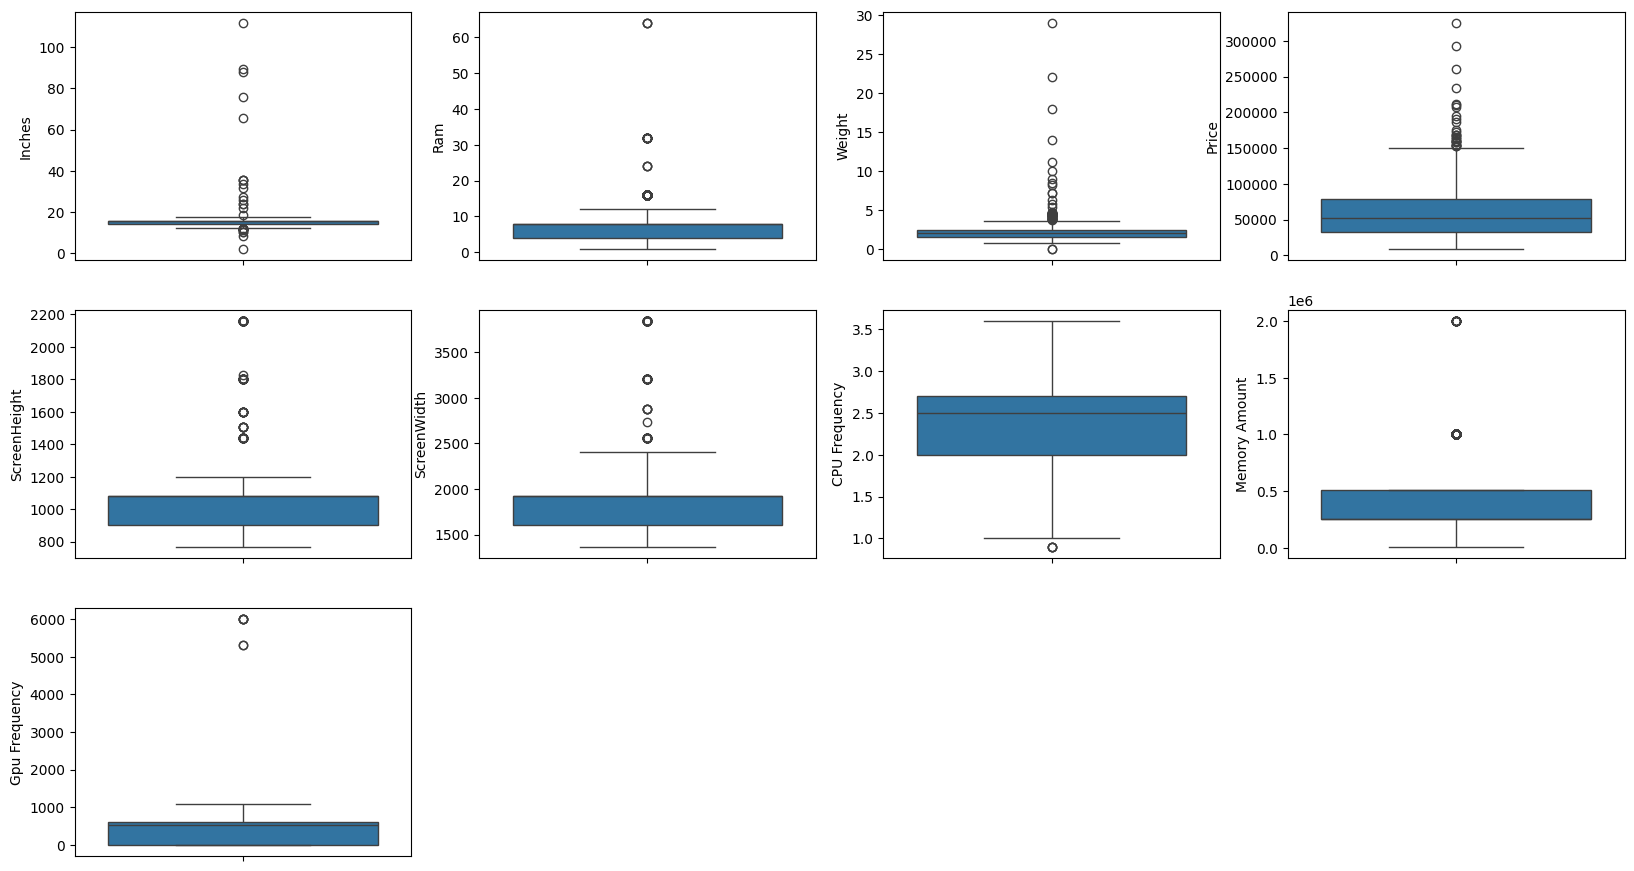

In [ ]:
# To find the outliers in box plots
plt.figure(figsize=(20,100))
for i in range(len(roundoff_float_cols.columns)):
  plt.subplot(26,4,i+1)
  sns.boxplot(y = roundoff_float_cols.columns[i],data=laptop)
plt.show()

In [ ]:
def calculateIQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - (1.5*IQR)
    UW = Q3 + (1.5*IQR)
    df = df[~(df[col] < LW)]
    df = df[~(df[col] > UW)]
    return df

In [ ]:
laptop = calculateIQR(laptop, 'Inches')
laptop = calculateIQR(laptop, 'Price')

<Axes: >

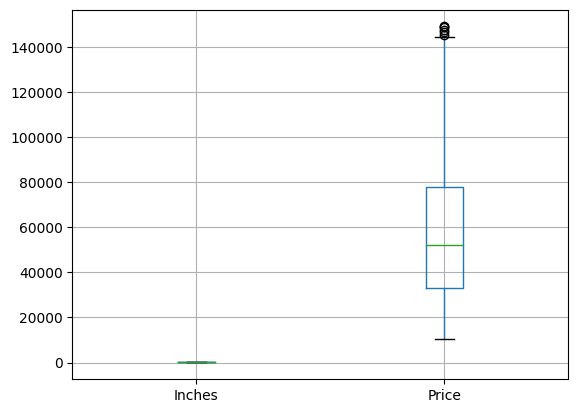

In [ ]:
laptop.boxplot(column=['Inches','Price'])

In [ ]:
laptop.shape

(1176, 15)

#3. DATA ANALYSIS

### Derived columns added to the dataframe using 'binning' technique

In [ ]:
laptop['Price'].describe()

count      1176.000000
mean      57814.552517
std       31322.459916
min       10442.880000
25%       32980.320000
50%       52054.560000
75%       77708.880000
max      149184.000000
Name: Price, dtype: float64

In [ ]:
'''
We shall create a derived column "Price_category" which contains bins of different categories of Price.
Categories - [0-10000],[10000-25000],[25000-50000],[50000-75000],[75000-100000],[100000-150000]

'''

laptop['Price_category'] = pd.cut(x=laptop['Price'],
                                 bins=[0,10000,25000,50000,75000,100000,125000,150000])

In [ ]:
# 7 bins/categories of Price is created

laptop['Price_category'].unique()

[(50000, 75000], (25000, 50000], (125000, 150000], (75000, 100000], (10000, 25000], (100000, 125000]]
Categories (7, interval[int64, right]): [(0, 10000] < (10000, 25000] < (25000, 50000] <
                                         (50000, 75000] < (75000, 100000] < (100000, 125000] <
                                         (125000, 150000]]

In [ ]:
laptop['Inches'].describe()

count    1176.000000
mean       15.110459
std         1.250628
min        12.000000
25%        14.000000
50%        15.600000
75%        15.600000
max        17.300000
Name: Inches, dtype: float64

In [ ]:
'''
We shall create a derived column "debt_to_income_category" which contains bins of different categories of Inches.
Categories - [0-5],[5-10],[10-15],[15-20]

'''

laptop['Inches_category'] = pd.cut(x=laptop['Inches'],
                                 bins=[0,5,10,15,20])

In [ ]:
laptop["Inches_category"].unique()

[(10, 15], (15, 20]]
Categories (4, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20]]

In [ ]:
laptop.shape

(1176, 17)

#Univariate analysis

Continuous variables of the dataframe :
* Company
* Typename
* Opsys
* CPU Brand
* Memory Type
* Gpu Brand

Categorical variables of the dataframe :
* Inches
* Ram
* Weight
* Price
* ScreenHeight
* ScreenWidth
* CPU Frequency
* Memory Amount
* Gpu Frequency
* Price_category
* Weight_category
* Inches_category

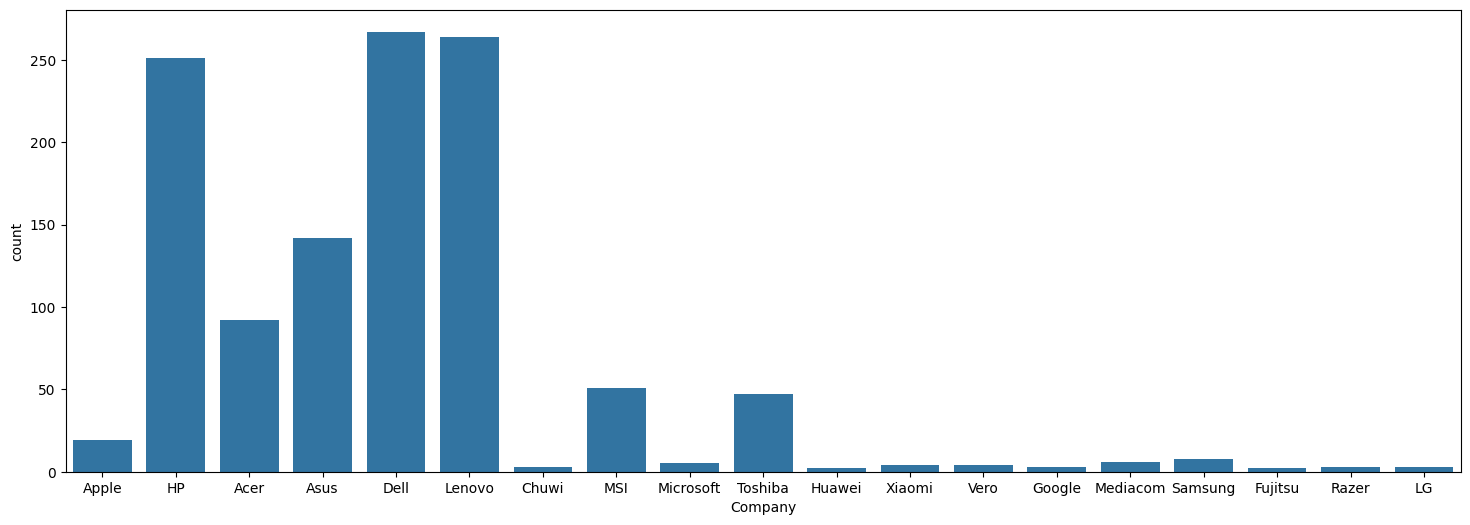

In [ ]:
# Countplot for 'Company'
plt.figure(figsize=(18,6))
sns.countplot(x = laptop["Company"])
plt.show()

Inference - Dell ,Lenovo and HP Company laptop are bought the most compared to other companies

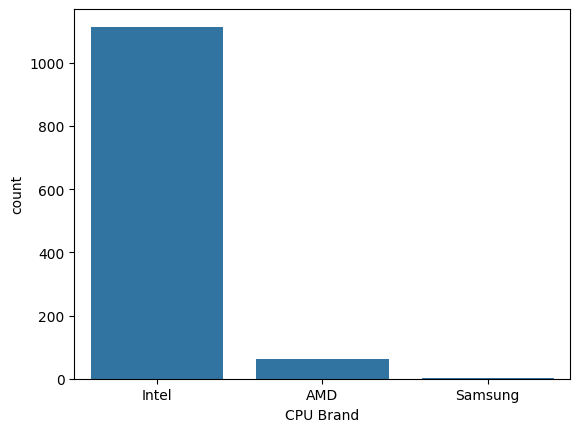

In [ ]:
# Countplot for 'Cpu brand'

sns.countplot(x ='CPU Brand', data=laptop)
plt.show()

Inference - Intel brand is bought the most, while AMD and Samsung CPU Brands are bought less

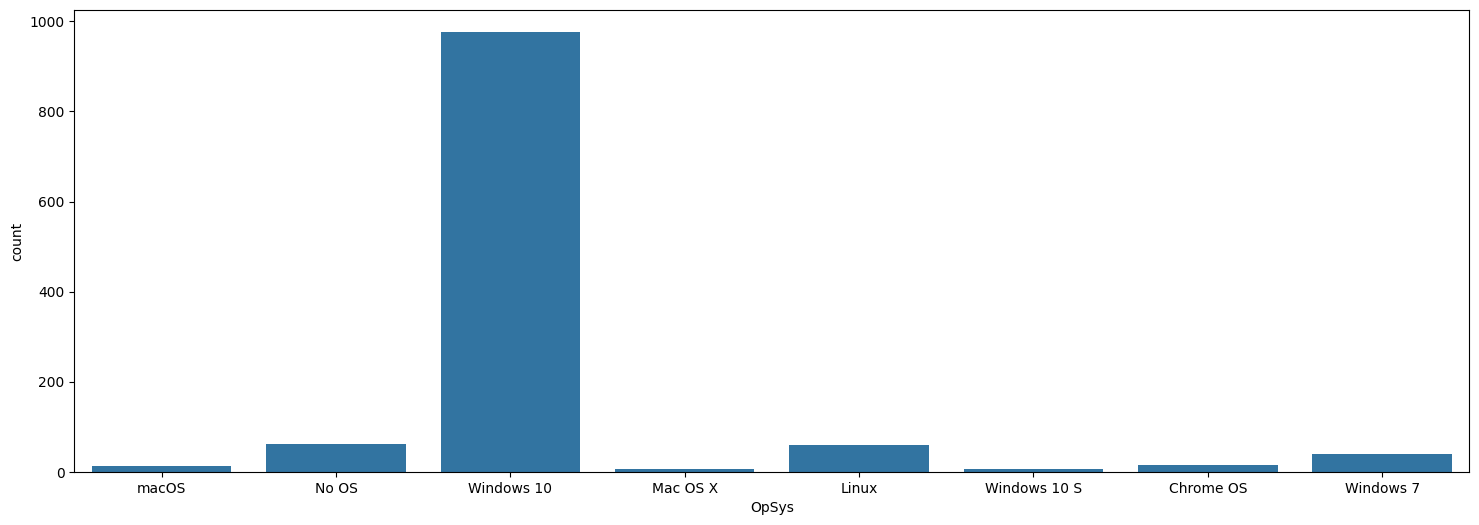

In [ ]:
# Countplot for 'OPsys'
plt.figure(figsize=(18,6))
sns.countplot(x ='OpSys', data=laptop)
plt.show()

Inference - 83.1% of the laptop consists of  windows 10  operating system

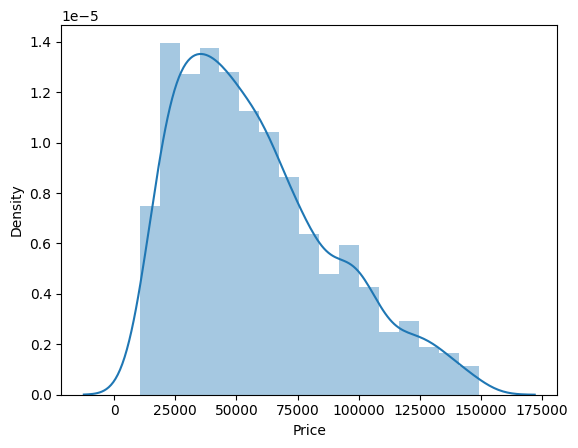

In [ ]:
# Distribution plot for 'Price'

sns.distplot(laptop['Price'])
plt.show()

Inference - laptop price is mostly between 25000 - 50000

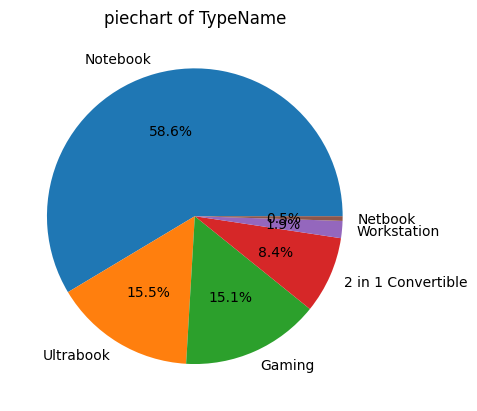

In [ ]:
counts=laptop['TypeName'].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.title('piechart of TypeName')
plt.show()

Inference - 56.9% of the laptop is of notebook type

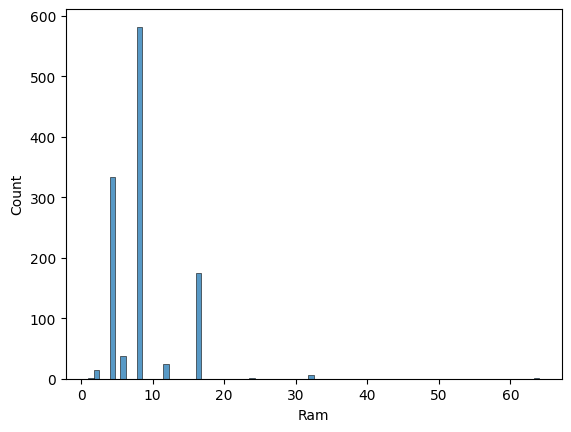

In [ ]:
# Histogram of 'Ram'

sns.histplot(laptop['Ram'])
plt.show()

Inference - Most of the laptop has 8.0GB Ram

##Segmented Univariate Analysis

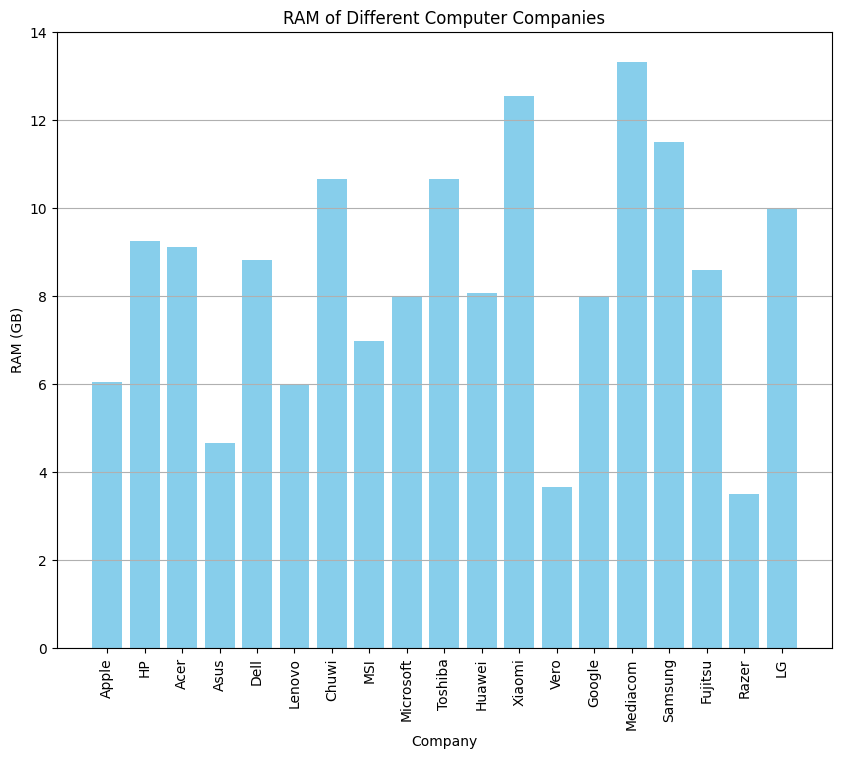

In [ ]:
Company=laptop['Company'].unique()
Ram=laptop.groupby('Company')['Ram'].mean()
# Create bar graph
plt.figure(figsize=(10, 8))
plt.bar(Company, Ram, color='skyblue')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('RAM (GB)')
plt.title('RAM of Different Computer Companies')
plt.grid(axis='y')
plt.xticks(rotation=90)


# Show plot
plt.show()

Inference - Mediacom has ram of around 12GB to 14GB

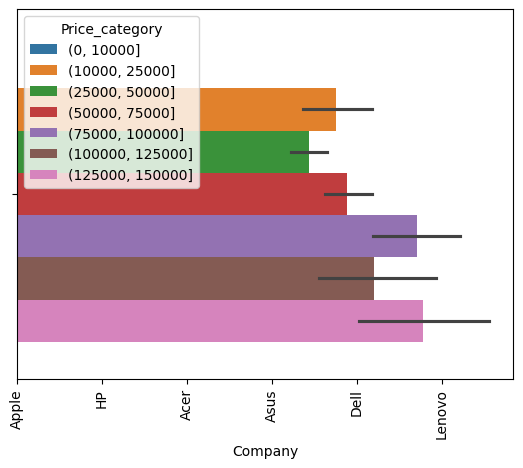

In [ ]:
# Grouping by 'purpose' category and analysing how many clients fully paid or charged off for each purpose of loan

sns.barplot(x='Company', hue="Price_category", data=laptop)
plt.xticks(rotation=90)
plt.show()

Inference - Mostly HP, Dell, Lenovo has the  price category of around 25000-50000  

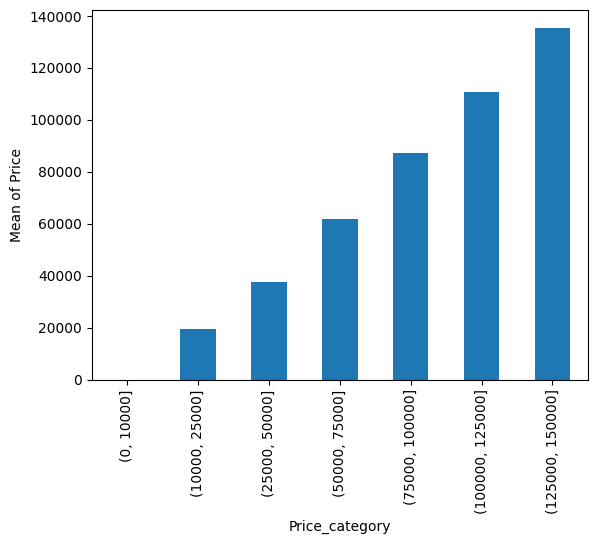

In [ ]:
# Grouping by 'price' and analysing the mean of 'price' for each bin

laptop.groupby('Price_category')['Price'].mean().plot(kind='bar',ylabel='Mean of Price')
plt.show()

Inference - Mean of Price_category (Price) increases linearly across the splitted buckets / bins

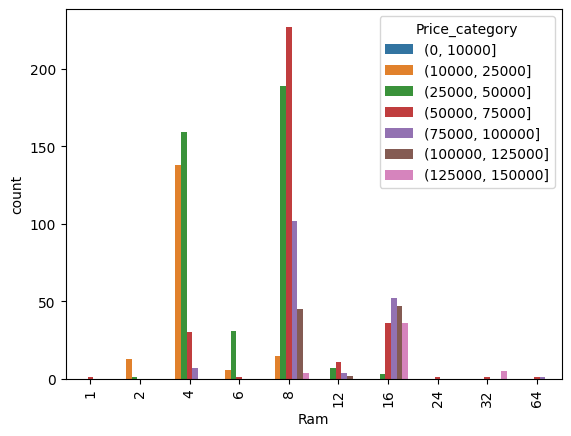

In [ ]:
# Grouping by 'purpose' category and analysing how many clients fully paid or charged off for each purpose of loan

sns.countplot(x='Ram', hue="Price_category", data=laptop)
plt.xticks(rotation=90)
plt.show()

Inference - 8.0 GB ram costs the highest at the range of 50000-75000

##Bivariate analysis

Numerical - Numerical

In [ ]:
numeric_col=laptop.select_dtypes(include=["int","float"])
numeric_col

,Inches,Ram,Weight,Price,ScreenHeight,ScreenWidth,CPU Frequency,Memory Amount,Gpu Frequency
0,13.3,8,1.37,71378.68,1600,2560,2.3,128000.0,640.0
1,13.3,8,1.34,47895.52,900,1440,1.8,128000.0,6000.0
2,15.6,8,1.86,30636.00,1080,1920,2.5,256000.0,620.0
3,15.4,16,1.83,135195.34,1800,2880,2.7,512000.0,455.0
4,13.3,8,1.37,96095.81,1600,2560,3.1,256000.0,650.0
...,...,...,...,...,...,...,...,...,...
1297,15.6,4,2.20,38378.65,768,1366,2.5,500000.0,0.0
1298,14.0,4,1.80,33992.64,1080,1920,2.5,128000.0,520.0
1299,13.3,16,1.30,79866.72,1800,3200,2.5,512000.0,520.0
1301,15.6,6,2.19,40705.92,768,1366,2.5,1000000.0,0.0


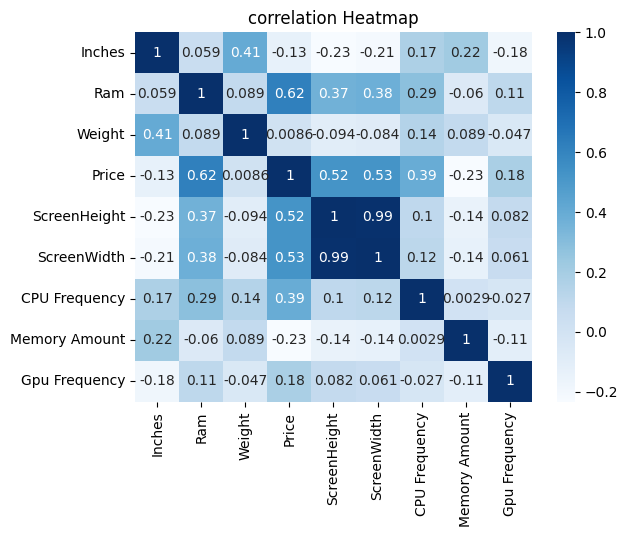

In [ ]:
correlation_matrix=numeric_col.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='Blues')
plt.title('correlation Heatmap')
plt.show()

Inference -  Price and Ram are highly corelated , Screenheight and Screenwidth with price are slightly corelated

#Multivariate Analysis

Numerical - Numerical

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
x=pd.DataFrame(laptop[['ScreenHeight','ScreenWidth',	"Ram"]])

In [ ]:
y=pd.DataFrame(laptop['Price'])

In [ ]:
# Importing the anova test and performed

select = SelectKBest(score_func=f_classif,k=2)
fit = select.fit(x,y)
features = x.columns[fit.get_support()]
features

Index(['ScreenHeight', 'Ram'], dtype='object')

Inference - Ram , screenheight and  their price are highly correlated and dependent

#Insights Obtained From Univariate Analysis
* Dell ,Lenovo and HP Company laptop are bought the most compared to other companies
* Intel brand is bought the most, while AMD and Samsung CPU Brands are bought less
* 83.1% of the laptop consists of windows 10 operating system
* 56.9% of the laptop is of notebook type
* laptop price is mostly between 25000 - 50000
* Most of the laptop has 8.0GB Ram


#Insights Obtained From Segmented Univariate Analysis
* Mostly HP, Dell, Lenovo has the price category of around 25000-50000
*  Mean of Price_category (Price) increases linearly across the splitted buckets / bins
* 8.0 GB ram costs the highest at the range of 50000-75000



#Insights Obtained From Bivariate Analysis
* By taking two numerical colums by using heatmap , Price and Ram are highly corelated

#Insights obtained From Multivariate Analysis
* From a Numerical to Numerical colum by using anova test we obtain Ram , screenheight and  their price are highly correlated and dependent

#Recommendations:
* Product Pricing:

Since the majority of laptop prices fall between 25000 – 50000, consider focusing on offering competitive pricing within this range. Ensure that your product lineup includes a variety of laptops with different specifications and features to cater to various consumer preferences within this price bracket.

* RAM Configuration:

Given that laptops with 8.0GB RAM are associated with higher price categories (around 50000 – 75000), consider emphasizing the value proposition of higher RAM configurations in your marketing efforts. Highlight the performance benefits of 8.0GB RAM and position these laptops as premium options for consumers who prioritize performance and multitasking capabilities.
